# Sentiment Analysis of Plots
In this notebook we reprise an [analysis](https://infogram.com/blog/scientists-use-big-data-to-discover-6-basic-emotional-story-arcs/) discussed in _Everybody Lies_. In this chapter Stephens-Davidowitz details an approach to measuring plots, looking at sentiment across a book. He posits six main plots:

1. Rags to Riches (rise)
1. Riches to Rags (fall)
1. Person in a hole (fall-rise)
1. Icarus (rise-fall)
1. Cinderella (rise-fall-rise)
1. Oedipus (fall-rise-fall)

In this notebook we'll pick a book from NLTK and do this. (Note that NLTK, by providing digitized copies of many books, has saved us a _lot_ of effort here.) 

## Getting more books
There are about 30 books available from [Project Gutenberg](https://www.gutenberg.org/) via NLTK. There are *many* more available, though. Those books are accessible from a Python package [`gutenberg`](https://pypi.python.org/pypi/Gutenberg). Unfortunately, that package is dependent on an Oracle DB package (BSD-DB), which is a hassle to load. For now, let's roll with NLTK.  

## Results from the Paper
Here's a graph from the technical results of the analysis:
![six story lines](https://about.infogr.am/wp-content/uploads/2016/10/storyarcs-1.jpg)

In [1]:
import random
import nltk
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

C:\Users\jchan\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# Let's start by looking at the books that came along with our NLTK installation
print(nltk.corpus.gutenberg.fileids())
print(nltk.corpus.shakespeare.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
['a_and_c.xml', 'dream.xml', 'hamlet.xml', 'j_caesar.xml', 'macbeth.xml', 'merchant.xml', 'othello.xml', 'r_and_j.xml']


In [3]:
# Pick one of these and assign it a shorter name.
hamlet = nltk.corpus.gutenberg.words("shakespeare-hamlet.txt") # using the "words" function

Let's check in at this point in the code--let me know when you're here.

In [4]:
print(len(hamlet))
print(hamlet[:10])

37360
['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']']


To do sentiment analysis, we're going to need a list of words that indicate positivity or negativity. NLTK has a bunch of this functionality built in. Let's start by playing around with the package.

Positive


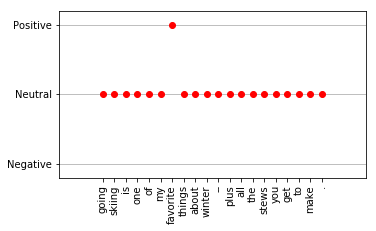

In [5]:
# Write your own sentence here
my_sent = "Going skiing is one of my favorite things about winter--plus all the stews you get to make."
demo_liu_hu_lexicon(my_sent,plot=True)

The `demo_liu_hu_lexicon` function does sentiment classification based on the [Liu and Hu opinion lexicon](https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html). The plotting is optional, but it tells you how the algorithm is working. 

Another useful set of lexicons comes with `tidytext`, a pretty sweet [book](http://tidytextmining.com/) detailing how to do text mining in R. I've downloaded their sentiment file and put it a text file called `tidytext_sentiments.txt`. This file is tab delimited, with headers and had three columns. The word, the sentiment ("positive" or "negative"), and the lexicon source of the word. 

In the cell below, read this file in and create a dictionary. The words will be the key and the value of the dictionary will be `1` if the word is positive and `-1` if the word is negative. 

In [ ]:
sentiment_scores = {}

# Open the file `tidytext_sentiments.txt`
# Fill up sentiment scores so it has values like 
# sentiment_scores['awesome'] = 1

assert(len(sentiment_scores) > 0)

As always, let's take a look at the data to see if it looks correct.

In [ ]:
for idx, word in enumerate(sentiment_scores) :
    print("{} has score {}.".format(word,sentiment_scores[word]))
    if idx > 30 :
        break

Now let's do some sentiment scoring. Your book is laid out as a series of words, thanks to the `.words()` function in NLTK. 

Let's pause here and talk about a reasonable algorithm.


In [ ]:
scores = [0] * len(hamlet)


# Here's a place for you to fill up your scoring vector

Now we'll write out our sentiment score to a text file, so that we can plot it in `ggplot` in R. Write this out as two columns, one being the index and the other being the score. 

In [ ]:
# here's a place to write out your file. 
